In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [10]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100, verbose=1)
print('Fit time:', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 6s 10ms/step - loss: 0.3935 - accuracy: 0.8827 - val_loss: 0.1153 - val_accuracy: 0.9648
Epoch 2/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0924 - accuracy: 0.9717 - val_loss: 0.0784 - val_accuracy: 0.9748
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0505 - accuracy: 0.9837 - val_loss: 0.0709 - val_accuracy: 0.9789
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0348 - accuracy: 0.9896 - val_loss: 0.0689 - val_accuracy: 0.9782
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0243 - accuracy: 0.9933 - val_loss: 0.0697 - val_accuracy: 0.9779
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.0669 - val_accuracy: 0.9794
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0118 - accuracy: 0.9971 - val_loss: 0.0667 - val_accuracy: 0.9802
Epoc

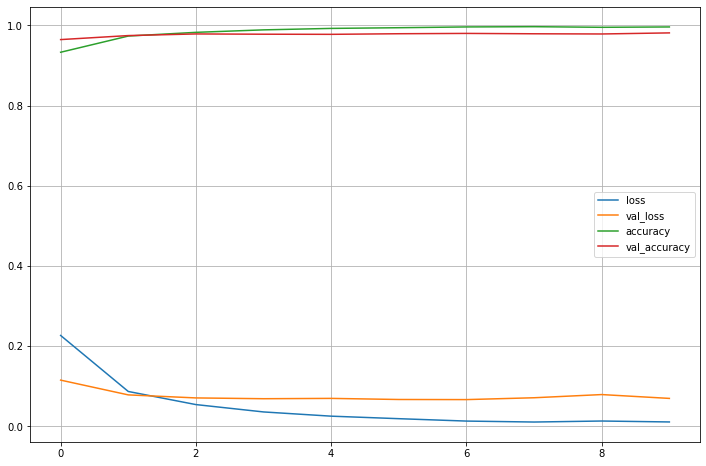

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid();

In [13]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9815
Test loss : 0.06965531408786774
Test accuracy : 0.9815000295639038


In [19]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [20]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [21]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

185

In [22]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[9015,
 1272,
 2280,
 2896,
 4176,
 4601,
 1678,
 2109,
 5982,
 3422,
 1681,
 9700,
 5937,
 2387,
 5676,
 2339]

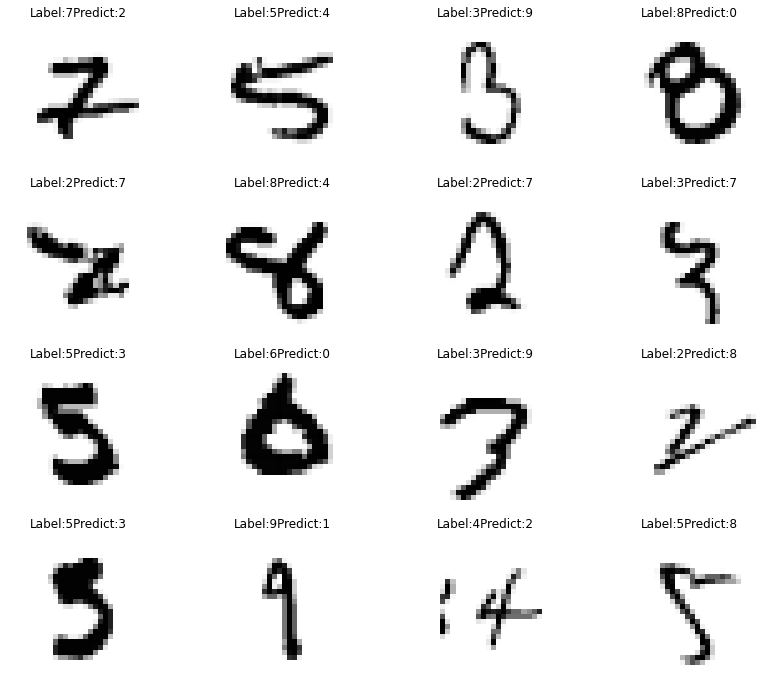

In [23]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label:' + str(y_test[n]) + 'Predict:' + str(predicted_labels[n]))
    plt.axis('off');

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

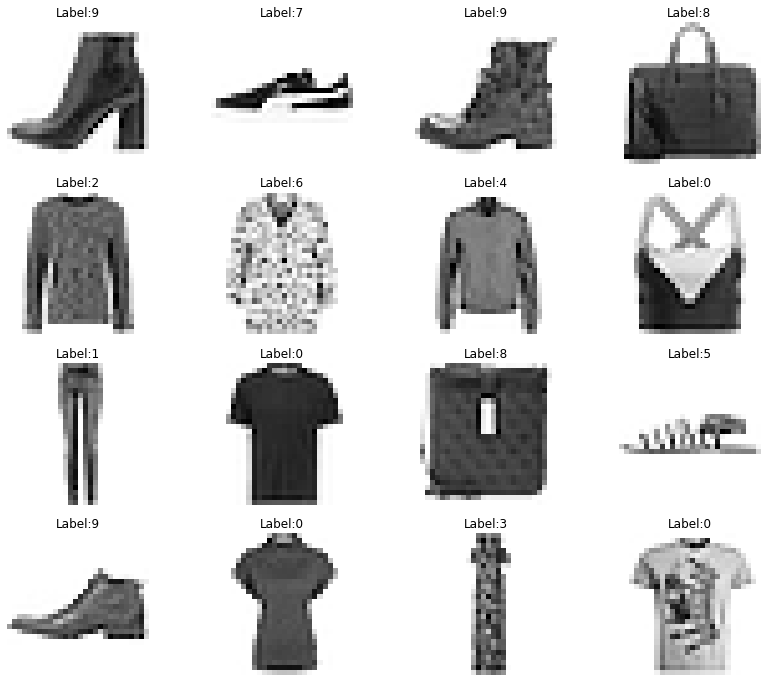

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

samples = random.choices(population=range(0, len(y_train)), k=16)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label:' + str(y_train[n]))
    plt.axis('off');

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [8]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=1)
print('Fit time:', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 7s 12ms/step - loss: 0.6083 - accuracy: 0.7889 - val_loss: 0.4303 - val_accuracy: 0.8448
Epoch 2/10
600/600 [==============================] - 7s 11ms/step - loss: 0.3688 - accuracy: 0.8661 - val_loss: 0.3813 - val_accuracy: 0.8617
Epoch 3/10
600/600 [==============================] - 8s 13ms/step - loss: 0.3260 - accuracy: 0.8794 - val_loss: 0.3646 - val_accuracy: 0.8693
Epoch 4/10
600/600 [==============================] - 7s 11ms/step - loss: 0.3062 - accuracy: 0.8876 - val_loss: 0.3388 - val_accuracy: 0.8743
Epoch 5/10
600/600 [==============================] - 6s 10ms/step - loss: 0.2766 - accuracy: 0.8975 - val_loss: 0.3333 - val_accuracy: 0.8789
Epoch 6/10
600/600 [==============================] - 6s 10ms/step - loss: 0.2577 - accuracy: 0.9047 - val_loss: 0.3324 - val_accuracy: 0.8811
Epoch 7/10
600/600 [==============================] - 6s 10ms/step - loss: 0.2456 - accuracy: 0.9082 - val_loss: 0.3399 - val_accuracy: 0.8761

In [58]:
hist.history['loss']

[0.024595176801085472,
 0.017648739740252495,
 0.03128058835864067,
 0.022070882841944695,
 0.015632620081305504,
 0.029748460277915,
 0.016459470614790916,
 0.031070556491613388,
 0.014362677000463009,
 0.017756571993231773]

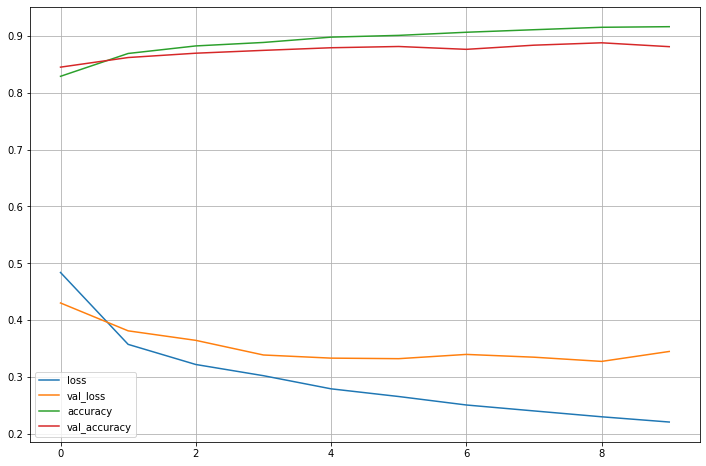

In [9]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid();

In [10]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8808
Test loss : 0.34504175186157227
Test accuracy : 0.8808000087738037


In [11]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [12]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [13]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

1192

In [14]:
samples = random.choices(population=wrong_result, k=16)
samples

[2869,
 8714,
 4307,
 4652,
 6379,
 9183,
 4823,
 5752,
 6620,
 4231,
 5082,
 7258,
 6542,
 406,
 2548,
 2843]

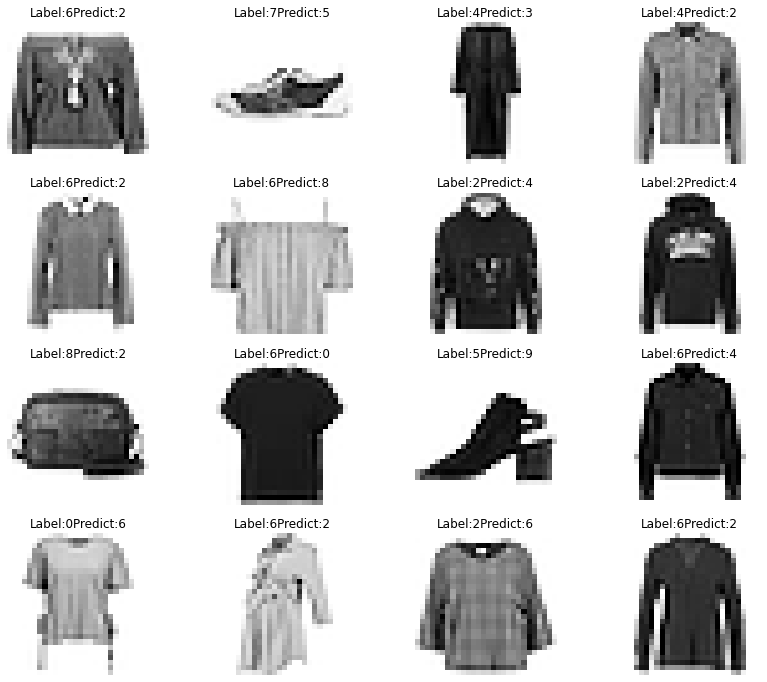

In [15]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label:' + str(y_test[n]) + 'Predict:' + str(predicted_labels[n]))
    plt.axis('off');